In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
attrs = []
target = []
for xls in os.listdir('sample_data/'):
    data = pd.read_excel('sample_data/'+xls, header=None)

    output = data.iloc[-1,0]
    output = np.float32(output.split(':')[-1])
    data = data.iloc[0:-1]
    attrs.append(np.array(data))
    target.append(np.float32(output))

attrs = np.array(attrs)
target = np.array(target)

In [ ]:
plt.figure(figsize=(15, 6))
for i in range(4):
    plt.subplot(2,2,i+1)
    x = np.mean(attrs[:,:,i], axis=1)
    plt.scatter(x, target)
    plt.axis([ min(x), max(x), 0, 1.5])
plt.tight_layout()

In [ ]:
min = np.min(attrs, axis=None)
max = np.max(attrs, axis=None)

print('min = ', min)
print('max = ', max)

In [ ]:
scaled_attrs = (attrs-min)/(max-min) + 0.01

In [ ]:
# for xls in os.listdir('sample_data/'):
#     data = pd.read_excel('sample_data/'+xls, header=None)

#     output = data.iloc[-1,0]
#     output = np.float32(output.split(':')[-1])
#     data.iloc[-1,0] = 0
#     data = (data-min)/(max-min) + 0.01
#     data.iloc[-1,0] = output
#     file_name = xls.split('.')[0]+'.csv'
#     data.to_csv('preprocessed_data/' + file_name)

In [ ]:
a = attrs[0,:,0]
# plt.hist(a[0:400],bins=5)
plt.hist([0,5,5,8,9], )

# 8 8 JICHUAN

In [ ]:
a = attrs[3,:,2]
b = a[a<0.00005]
plt.plot(np.sort(b))

In [ ]:
index = np.arange(0,7500,5)
b = attrs[0,:,3]
b = [ a[i] if foo else -0.01*a[i] for i,foo in enumerate(b>0.000003)]
plt.figure(figsize=[15,6])
plt.plot(b[0:500])

In [ ]:
index = np.arange(0,7500,5)
b = scaled_attrs[0,:,2] 
b = [ b[i] if foo else -0.01*b[i] for i,foo in enumerate(b>0.015)]
plt.figure(figsize=[15,6])
plt.plot(b[0:500])

# 1.18 vs 0.36

In [3]:
sorted_target = np.sort(target)
middle_target = sorted_target[len(sorted_target)//2]

In [4]:
selection = np.logical_or(target == min(target), target == max(target), )
selection = np.logical_or(selection, middle_target == target)
cattrs = attrs[selection]
ctargets = target[selection]

In [ ]:
plt.scatter(cattrs[:,:,0].mean(axis=1), ctargets)
plt.axis([2.7e-06, 3.6e-06, 0, 1.2])

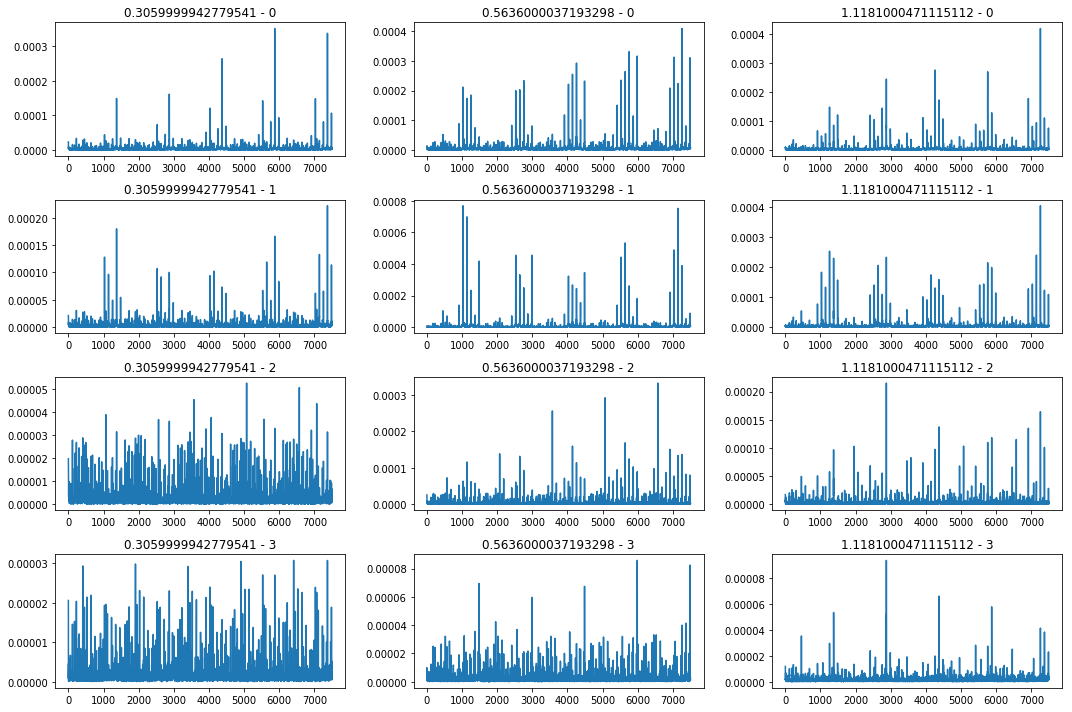

In [7]:
plt.figure(figsize=[15,10])
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(cattrs[i%3,:,i//3])
    plt.title("{} - {}".format(ctargets[i%3], i//3))
plt.tight_layout()

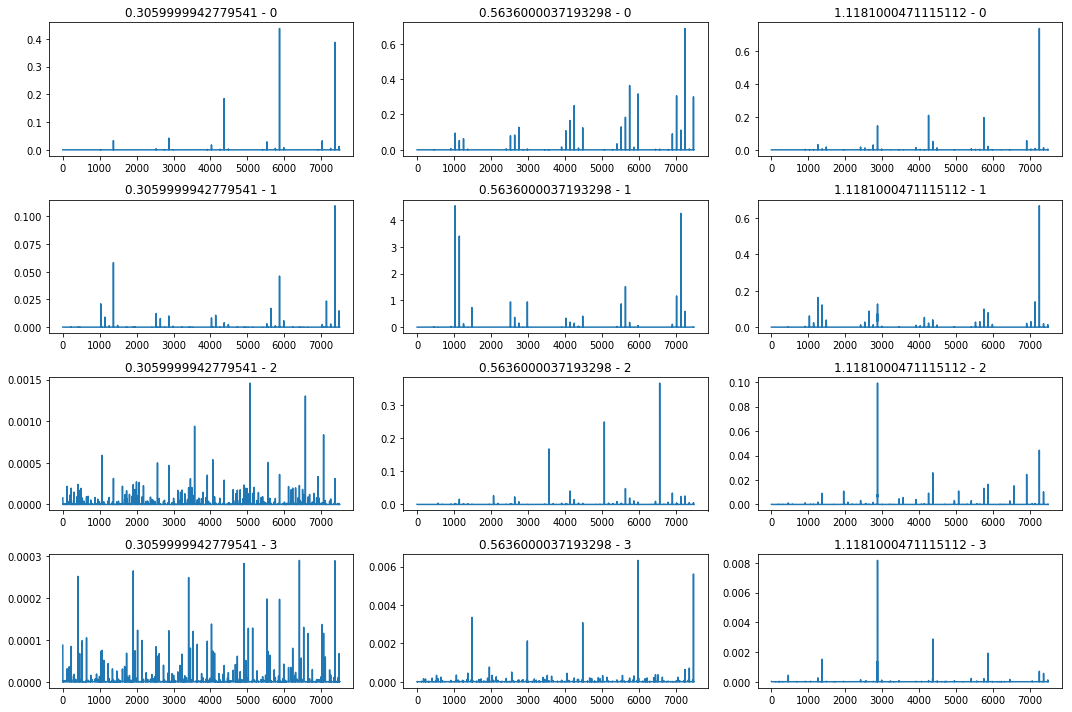

In [16]:
plt.figure(figsize=[15,10])
for i in range(12):
    plt.subplot(4,3,i+1)
    y = np.array(cattrs[i%3,:,i//3], dtype=np.float32)
    plt.plot(np.power(y,3)*1e10)
    plt.title("{} - {}".format(ctargets[i%3], i//3))
plt.tight_layout()

In [ ]:
plt.figure(figsize=[15,6])
plt.subplot(121)
plt.scatter(cattrs[2,:,0], cattrs[2,:,1], s=1)
plt.axis([-0.00001, 0.0001,-0.00001, 0.0001])
plt.title(ctargets[2])
plt.subplot(122)
plt.scatter(cattrs[0,:,0], cattrs[0,:,1], s=1)
plt.axis([-0.00001, 0.0001,-0.00001, 0.0001])
plt.title(ctargets[0])

In [6]:
print(ctargets)

[0.306  0.5636 1.1181]
